# Logistic Regression with Python



## Description

Challenge taken here : [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic)

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

![Image du titanic](titanic.jpg)


One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown here.

Logistic Regression is a good method for classification (predict discrete categories). 

## Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
train = pd.read_csv('titanic_train.csv')
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [4]:
# Print the shape of the DataFrame
train.shape

(891, 12)

# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [5]:
# Check if cells are empty 
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

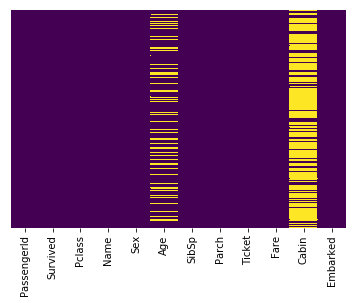

In [7]:
# Easily visualise empty cells by ploting a heatmap of the isnull table
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing.   
The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. 
Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. 
We'll probably drop this later.

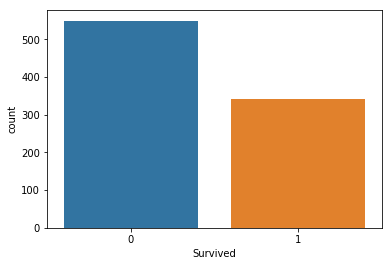

In [45]:
# A countplot is a histogram of value occurences in a column
sns.countplot(x="Survived",data=train)

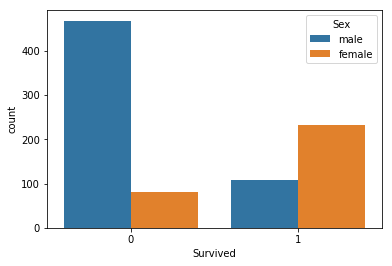

In [46]:
# You can add a 'hue' to take into account another column in your histogram 
sns.countplot(x='Survived',hue='Sex',data=train)

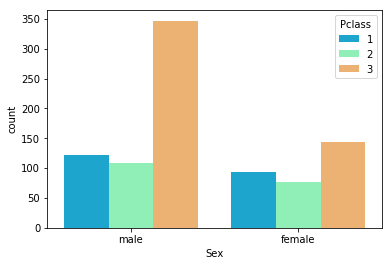

In [48]:
# Change the color by adding a palette. Available palettes are in seaborn documentation
sns.countplot(x='Sex', hue='Pclass', data=train, palette='rainbow')

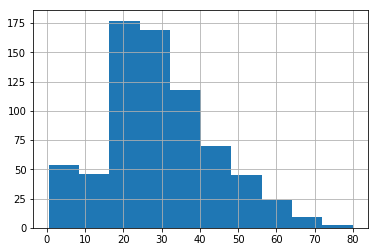

In [49]:
# You can also choose to plot directly with matplotlib by calling the .hist 
# function directly on the desired column
train['Age'].hist()

/Users/mathieu/.local/share/virtualenvs/datascience-jvBLA0MN/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


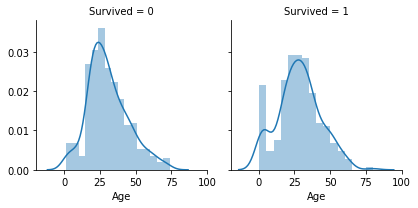

In [50]:
q = sns.FacetGrid(train, col = 'Survived')
q.map(sns.distplot, 'Age')

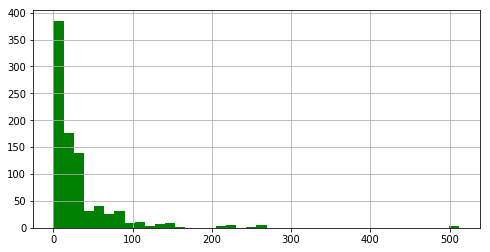

In [51]:
# The "bins" variable defines the number of bars in the graph
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [52]:
# Get a correlation matrix of the columns
corr = train.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


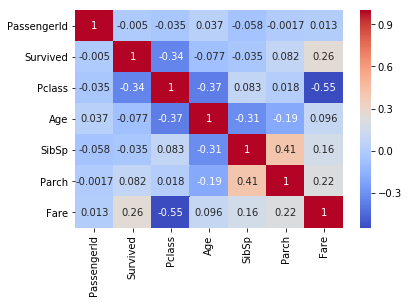

In [53]:
# And  plot a heatmap from it
sns.heatmap(corr,cmap='coolwarm', annot=True)

## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

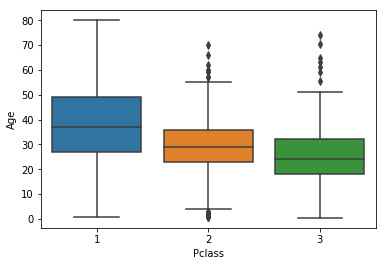

In [54]:
# Box plot of ages VS Pclass
sns.boxplot(x='Pclass',y='Age',data=train)
# Get the mean of age per Pclass
train.groupby('Pclass')['Age'].mean()

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [55]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25
    else:
        return Age

Now apply that function!

In [56]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

Now let's check that heat map again!

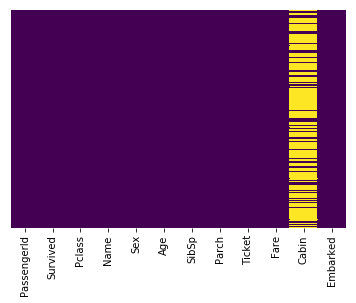

In [57]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [58]:
# Drop the 'Cabin' column
train = train.drop('Cabin',axis=1)

In [59]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [60]:
# Removing any row with remaining empty value
train.dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas!  
Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [63]:
# Change 'H' and 'F' values of sex column for 1s and 0s
sex = pd.get_dummies(train['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [64]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [65]:
# Remove old columns and unused ones 
# 'Names' and 'Ticket' are not relevant for the analysis
train.drop(['Sex','Name','Ticket','Embarked','PassengerId'],axis=1,inplace=True)

In [66]:
# Concatatenate our table with dummy columns
train = pd.concat([train,sex],axis=1)

In [67]:
# Check the result
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


## Feature Engineering

Let's see if we can change our features to make rules more apparent.

In [68]:
# Create feature "FamilySize" as a combination of siblings/spouses and parents/children
train['FamilySize'] = train ['SibSp'] + train['Parch'] + 1
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,FamilySize
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,2
2,1,3,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,1


In [69]:
def check_is_alone(cols):
    is_alone = cols[0]
    family_size = cols[1]
    if family_size == 1:
            return 1
    else:
        return 0

In [70]:
# Add "IsAlone column"
train['IsAlone'] = 1 #initialize to yes/1 is alone
train['IsAlone'] = train[['IsAlone','FamilySize']].apply(check_is_alone, axis=1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,FamilySize,IsAlone
0,0,3,22.0,1,0,7.2500,1,2,0
1,1,1,38.0,1,0,71.2833,0,2,0
2,1,3,26.0,0,0,7.9250,0,1,1
3,1,1,35.0,1,0,53.1000,0,2,0
4,0,3,35.0,0,0,8.0500,1,1,1


In [71]:
train.drop(['SibSp','Parch'], axis=1, inplace=True)
train.head()

,Survived,Pclass,Age,Fare,male,FamilySize,IsAlone
0,0,3,22.0,7.2500,1,2,0
1,1,1,38.0,71.2833,0,2,0
2,1,3,26.0,7.9250,0,1,1
3,1,1,35.0,53.1000,0,2,0
4,0,3,35.0,8.0500,1,1,1


Great! Our data is ready for our model!

# Building a model

The usual process in Machine Learning is to split the available data into a training and a testing dataset.  
In fact we don't want to test our algorithm on the same data we used to train it, it would be too easy !  

Let's start by splitting our data into a training set and test set.  
Hopefully there is a special function in sklearn to do that. 

The test_size is 0.30 which means we are going to use 70% of the data to train our algorithm. 
- X_train contains 70% of the data, without the 'survived' column
- y_train contains the matching 'Survived' column
- X_test contains 30% of the data without the labeled column, and will be use to test our algorithm once trained
- y_test contains the matching 'Survied' column and will be uses to compare the predictions of the algorithm with reality. 


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
# Generating all our training and testing values at once
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.3, random_state=101)


In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver='lbfgs', max_iter=2000) 
logmodel.fit(X_train,y_train) # model is trained

randomforestmodel = RandomForestClassifier(n_estimators=100, max_depth=6)
randomforestmodel.fit(X_train,y_train)  # model is trained

treemodel = DecisionTreeClassifier(max_depth=4, random_state=0)
treemodel.fit(X_train,y_train) # model is trained

print('Models trained')

Models trained


Let's move on to evaluate our model!

## Evaluation

We can check precision, recall, f1-score using classification report!

In [79]:
from sklearn.metrics import classification_report, confusion_matrix

In [80]:
# Predict values using trained models
predictions = treemodel.predict(X=X_test)
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0])

In [81]:
# Confront results to actual answers
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       163
           1       0.85      0.72      0.78       104

   micro avg       0.84      0.84      0.84       267
   macro avg       0.85      0.82      0.83       267
weighted avg       0.84      0.84      0.84       267



**The precision** is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.  
Ex : 81% of the time the algorithm makes the right prediction about the fact that someone did not survive


**The recall** is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.  
Ex : 35% of the time the algorithm does not detect that someone will survive

**The F1 score** can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The formula for the F1 score is:
F1 = 2 * (precision * recall) / (precision + recall)


**The support** is the number of occurrences of each class in y_true.

**Confusion matrix** : a matrix where C_{i, j} is equal to the number of observations known to be in group i but predicted to be in group j.


In [82]:
treemodel.feature_importances_

array([0.14029736, 0.0803552 , 0.10411448, 0.57774552, 0.09748744,
       0.        ])

In [ ]:
# from sklearn.naive_bayes import GaussianNB
impo# from sklearn.svm import SVC

In [1]:
import pandas
import requests
json = requests.get("http://datascience.fabdev.fr/data.json").json()
dataset = pandas.read_json("http://datascience.fabdev.fr/data.json",convert_dates=["date_heure"])
dataset.set_index('date_heure',inplace=True)
dataset.head()

,bioenergies,bioenergies_biogaz,bioenergies_biomasse,bioenergies_dechets,charbon,consommation,date,ech_comm_allemagne_belgique,ech_comm_angleterre,ech_comm_espagne,...,hydraulique_lacs,hydraulique_step_turbinage,nature,nucleaire,perimetre,pompage,prevision_j,prevision_j1,solaire,taux_co2
date_heure,,,,,,,,,,,,,,,,,,,,,
2018-02-19 00:00:00,1070,233,593,244,-12,62437,2018-02-19,4846.0,-2000.0,-2600.0,...,1925,0,Données temps réel,52072,France,-839,62300,62100,0,53
2018-02-19 00:15:00,1067,233,591,243,71,62809,2018-02-19,NaN,NaN,NaN,...,1917,0,Données temps réel,52140,France,-840,62700,62500,0,55
2018-02-19 00:30:00,1070,233,596,241,102,62240,2018-02-19,4846.0,-2000.0,-2600.0,...,1862,0,Données temps réel,51860,France,-852,63100,62900,0,55
2018-02-19 00:45:00,1071,233,594,244,123,62246,2018-02-19,NaN,NaN,NaN,...,1925,0,Données temps réel,51949,France,-1078,62900,62950,0,56
2018-02-19 01:00:00,1068,233,592,243,157,61787,2018-02-19,5432.0,-2000.0,-2600.0,...,1969,0,Données temps réel,51779,France,-1089,62700,63000,0,56


In [12]:
moving_avg_dataset = dataset['charbon'].rolling(4, win_type='triang').mean()
